# Storia delle Olimpiadi

Il database consiste di due tabelle: la prima riporta i dati storici (271.116 righe) delle edizioni delle Olimpiadi fino al 2016, la seconda i codici dei paesi partecipanti.

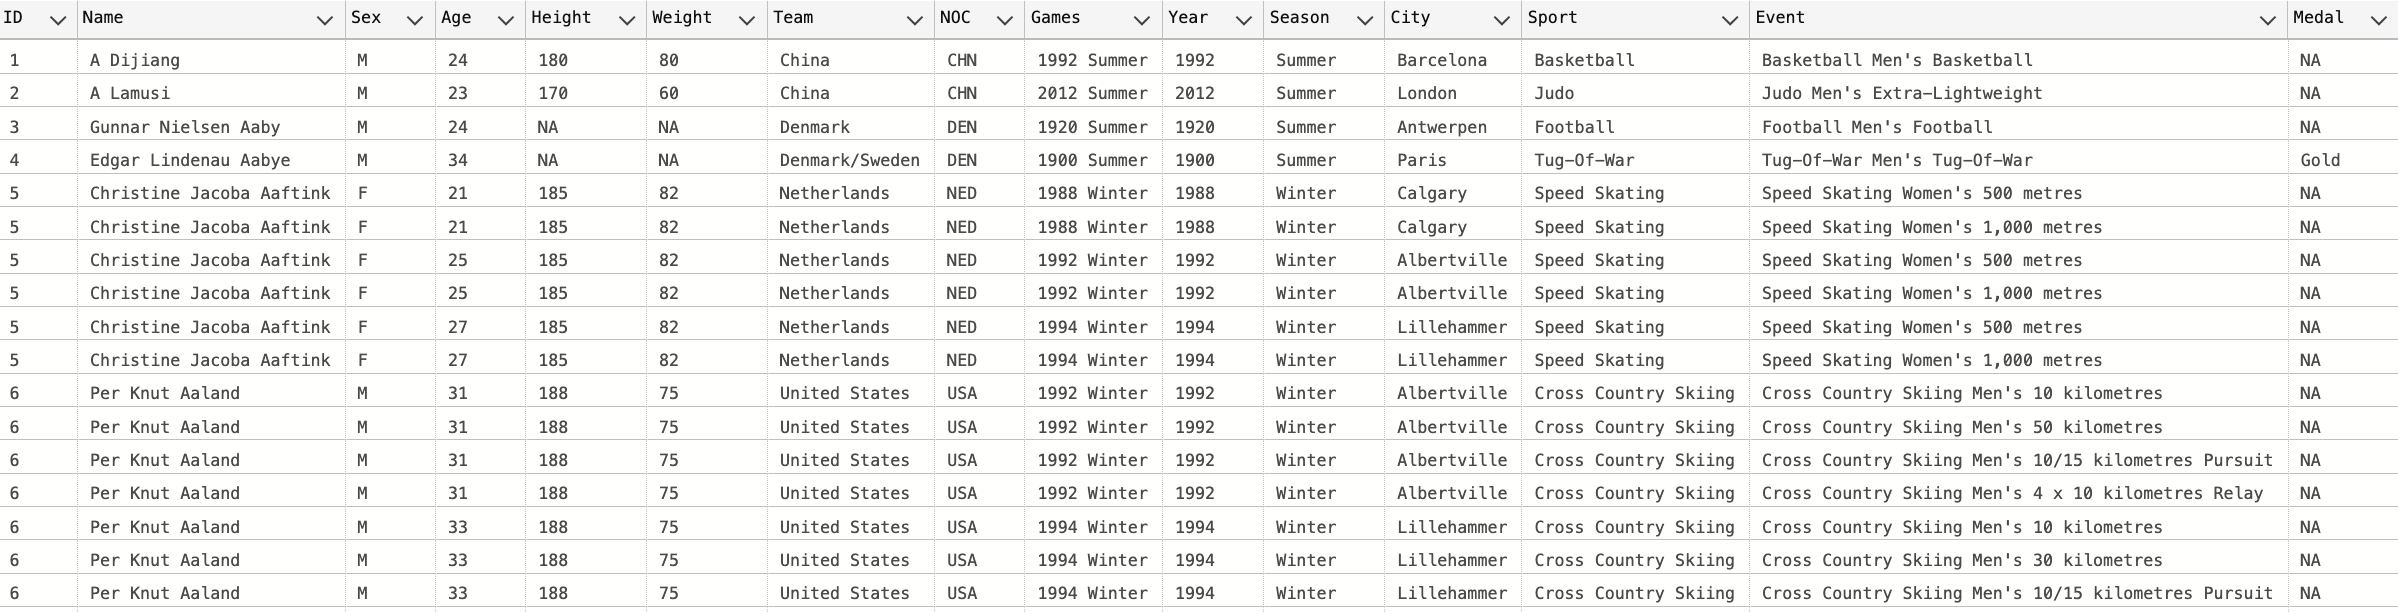

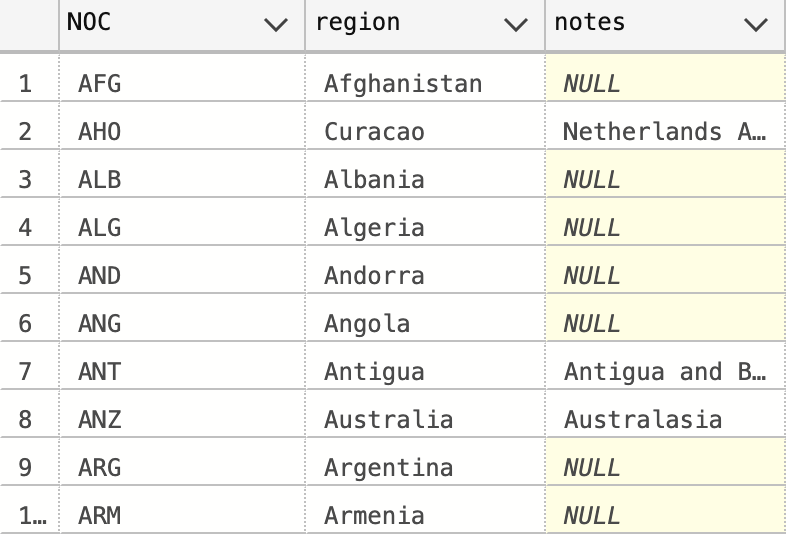

In [6]:
from IPython.display import display, Image
display(Image(filename="olympics_data.png", height=900, width=900))
display(Image(filename="noc_regions.png", height=400, width=400))

**1. In quale anno la partecipazione è stata massima e minima:**

In [ ]:
with t1 as(
select concat(oh.games, ' - ', count(distinct nr.region)) as total_countries
from Olympics_History oh
join NOC_Regions nr
	on oh.NOC = nr.NOC
group by oh.games
--order by 1
) select min(total_countries) as lowest_countries,
		 max(total_countries) as highest_countries
from t1

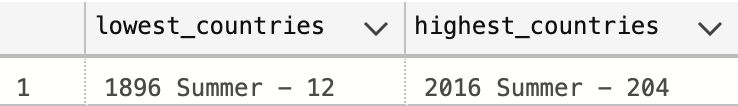

In [12]:
display(Image(filename="max_min_partecip.png", height=600, width=600))

**2. Quale sport è stato inserito solamente una volta nelle competizioni:**

In [ ]:
with t1 as(
select sport, count(distinct games) as no_of_games
from Olympics_History
group by sport
having count(distinct games) = 1
--order by 1
) select distinct t1.*, oh.games
from t1
join Olympics_History oh
	on t1.Sport = oh.Sport
order by 1

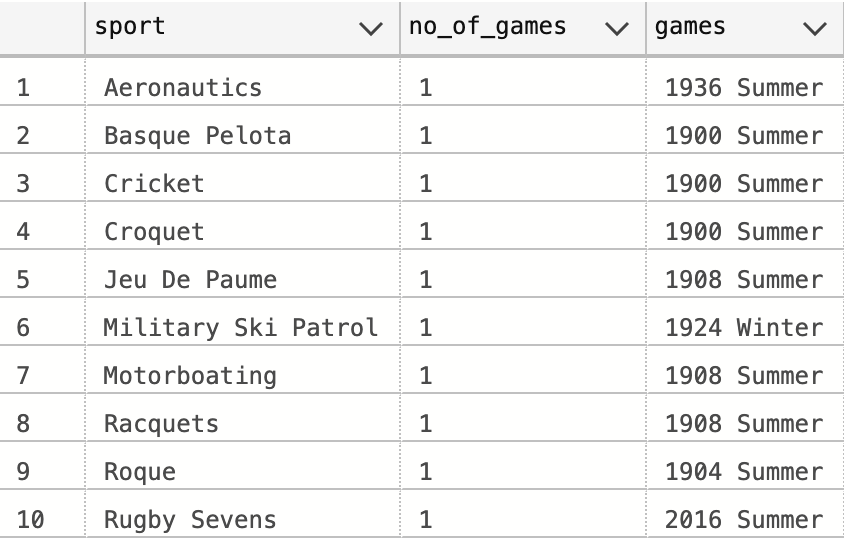

In [10]:
display(Image(filename="partecipated_once.png", height=600, width=600))

**3. Calcolare il rapporto uomini/donne tra gli atleti di tutte le edizioni:**

In [ ]:
with t1 as(
select distinct (select count(*)
from Olympics_History
where sex = 'f')  as females,

(select cast(count(*) as float) as males
from Olympics_History
where sex = 'm'
) as males from Olympics_History
) select concat('1 : ', round(males/females,2)) as 'ratio (f:m)' from t1

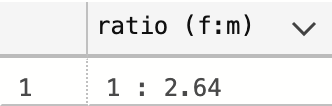

In [14]:
display(Image(filename="male_female.png", height=400, width=400))

**4. Selezionare i 5 paesi che hanno vinto più medaglie complessivamente:**

In [ ]:
with t1 as(
select nr.region, count(medal) as tot_medals 
from Olympics_History oh
join NOC_Regions nr
	on oh.NOC = nr.NOC
where medal <> 'na'
group by nr.region
--order by 3 desc
), t2 as(
select region, tot_medals, dense_rank() over (order by tot_medals desc) as rnk
from t1
) select region, tot_medals, rnk
from t2
where rnk <=5

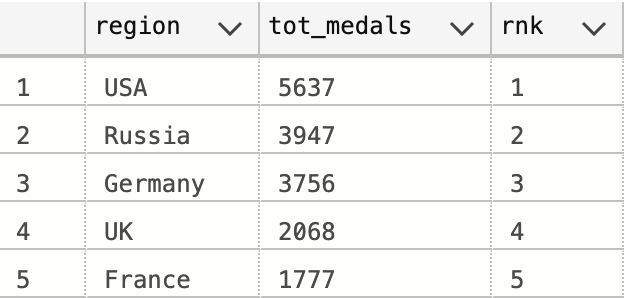

In [15]:
display(Image(filename="most_medals.png", height=600, width=600))

**5. Calcolare il numero totale di medaglie vinto da ogni paese:**

In [ ]:
select nr.region as country, oh.medal, count(1) as total_medals
from Olympics_History oh
join NOC_Regions nr
	on oh.NOC = nr.NOC
where medal <> 'na'
group by nr.region, oh.Medal
order by nr.region, oh.Medal

select country, [Gold] as gold, [Silver] as silver, [Bronze] as bronze
from (select nr.region as country, oh.medal, count(1) as total_medals
		from Olympics_History oh
		join NOC_Regions nr
			on oh.NOC = nr.NOC
		where medal <> 'na'
		group by nr.region, oh.Medal
		--order by nr.region, oh.Medal
	 ) as pvtsource
pivot
	(sum(total_medals)
	 for medal in ([Bronze], [Silver], [Gold])
	) as pivotescion
order by 2 desc

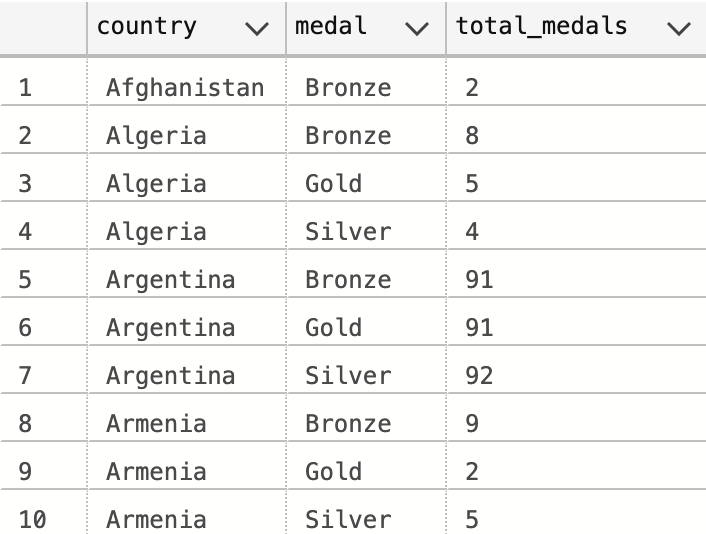

In [19]:
display(Image(filename="tot_medals.png", height=400, width=400))

**6. Calcolare quale paese ha vinto più ori, argenti e bronzi in ogni edizione:**

In [ ]:
with t1 as(
select oh.games, nr.region, count(*) as golds
from Olympics_History oh
join NOC_Regions nr 
	on oh.NOC = nr.NOC
where medal = 'gold'
group by oh.games, nr.region
), t2 as(
select oh.games, nr.region, count(*) as silvers
from Olympics_History oh
join NOC_Regions nr 
	on oh.NOC = nr.NOC
where medal = 'silver'
group by oh.games, nr.region
), t3 as(
select oh.games, nr.region, count(*) as bronzes
from Olympics_History oh
join NOC_Regions nr 
	on oh.NOC = nr.NOC
where medal = 'bronze'
group by oh.games, nr.region
) select distinct t1.games,
		 concat(
		 FIRST_VALUE(t1.region) over (partition by t1.games order by t1.golds desc),
		 ' - ',
		 FIRST_VALUE(t1.golds) over (partition by t1.games order by t1.golds desc) 
		 )as max_golds,
		 concat(
		 FIRST_VALUE(t2.region) over (partition by t2.games order by t2.silvers desc),
		 ' - ',
		 FIRST_VALUE(t2.silvers) over (partition by t2.games order by t2.silvers desc) 
		 )as max_silvers,
		 concat(
		 FIRST_VALUE(t3.region) over (partition by t3.games order by t3.bronzes desc),
		 ' - ',
		 FIRST_VALUE(t3.bronzes) over (partition by t3.games order by t3.bronzes desc) 
		 )as max_bronzes
from t1
join t2 on t1.games = t2.games
join t3 on t2.games = t3.games

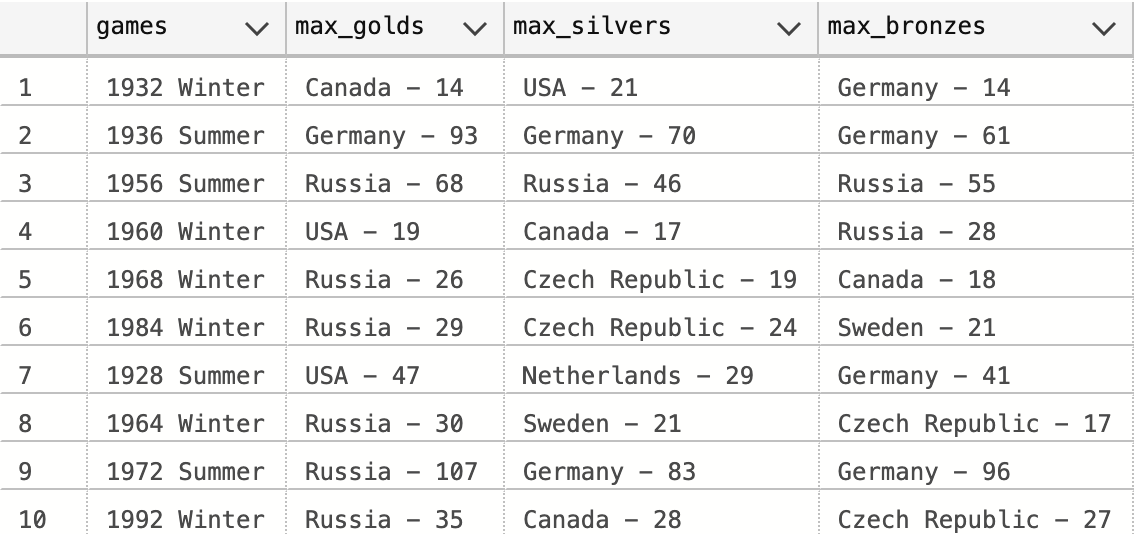

In [20]:
display(Image(filename="num_medals.png", height=600, width=600))